--- MODEL PERFORMANCE REPORT ---
dt done
rf done
nb done
lr done
xgb done
AUC Score: 0.7471328703148943
AUC Score: 0.885341156873712
AUC Score: 0.8408839203273788
AUC Score: 0.7797898344101128
AUC Score: 0.8083703081468189
AUC Score: 0.8759723017128943


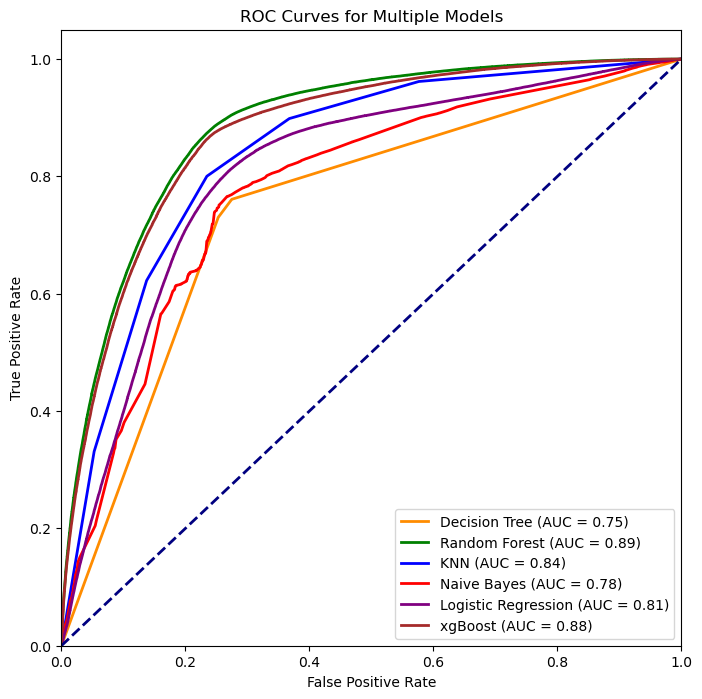

In [3]:
# **Notes**: 
# 1. RUN newPreprocessing.py BEFORE RUNNING THIS FILE TO GET THE final_data.csv FILE
# 2. I am running this with scikit-learn 1.2.2 instead of 1.3.0 because the latter had a bug with model.predict in the method knn()
    # for more information, see debugging forum: https://github.com/scikit-learn/scikit-learn/issues/26768

import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

import argparse
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
#import scikitplot as skplt


# Ignore FutureWarnings related to is_sparse in scikit-learn (I had to use an earlier version of sklearn bc there was a bug with KNN, so I kept getting depreciaiton warnings)
#warnings.filterwarnings("ignore", category=FutureWarning)

# this gives a report on various scores to determine how well the model did:
def result_report(model, x_train, y_train, x_test, y_test, y_pred, model_name):
    
    perf_df=pd.DataFrame({'Train_Score': model.score(x_train, y_train), "Test_Score": model.score (x_test, y_test),
                       "Precision_Score": precision_score(y_test, y_pred, average='weighted'), "Recall_Score": recall_score(y_test, y_pred, average='weighted'),
                       "F1_Score": f1_score(y_test, y_pred, average='weighted'), "accuracy": accuracy_score(y_test, y_pred)}, index=[model_name])
    return perf_df

def plot_roc_curve(model, x_test, y_test, model_name, col):
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print("AUC Score:", roc_auc_score(y_test, y_prob))
    plt.plot(fpr, tpr, color=col, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # plt.figure(figsize=(8, 8))
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title(f'ROC Curve - {model_name}')
    # plt.legend(loc="lower right")
    # plt.show()

# these are the models tested:
def decisionTree(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(x_train, y_train)
    #y_pred = dt.predict(x_test)
    #print(result_report(dt, x_train, y_train, x_test, y_test, y_pred, 'Decision Tree'))
    print('dt done')
    #plot_roc_curve(dt, x_test, y_test, 'Decision Tree')
    return dt

def randomForest(x_train, y_train, x_test, y_test):
    maxDepth_vals = [3, 5, 10, 20, 40, 50]
    minLeafSamples_vals = [1, 2, 5, 10, 15, 20] # default is 2
    nest_vals = [50, 100, 150, 200, 300, 400] # default is 100
    maxFeat_vals = [2, 4, 5, 8, 12, 14] # default is sqrt -> 4


    accuracies = []
    #model = RandomForestClassifier(random_state=42, max_depth=25, min_samples_leaf=1, n_estimators=400, criterion='entropy')
    #model.fit(x_train, y_train)
    #y_pred = model.predict(x_test)
    #print(result_report(model, x_train, y_train, x_test, y_test, y_pred, f'Random Forest (criterion=entropy)'))

    model = RandomForestClassifier(random_state=42, max_depth=25, min_samples_leaf=1, max_features=8)
    model.fit(x_train, y_train)
    print('rf done')
    #plot_roc_curve(model, x_test, y_test, 'Random Forest')

    # for maxFeat in maxFeat_vals:
    #     model = RandomForestClassifier(random_state=42, max_depth=25, min_samples_leaf=1, n_estimators=400, max_features=maxFeat)
    #     model.fit(x_train, y_train)
    #     y_pred = model.predict(x_test)
        
    #     # Print result report for each max_depth
    #     print(result_report(model, x_train, y_train, x_test, y_test, y_pred, f'Random Forest (max_feat={maxFeat})'))
    #     print('----------------------------------')

    #     # Collect accuracy
    #     accuracy = accuracy_score(y_test, y_pred)
    #     accuracies.append(accuracy)

    # plt.figure(figsize=(10, 6))
    # plt.plot(maxFeat_vals, accuracies, marker='o')
    # plt.title('Random Forest Accuracy vs Max Number of Features')
    # plt.xlabel('max number of features')
    # plt.ylabel('Accuracy')
    # plt.xticks(maxFeat_vals)
    # plt.grid(True)
    # plt.show()
    return model
    
    # model = RandomForestClassifier(random_state=42)
    # model.fit(x_train, y_train)
    # y_pred = model.predict(x_test)
    # print(result_report(model, x_train, y_train, x_test, y_test, y_pred, 'Random Forest'))
    # print('----------------------------------')
    #plot_roc_curve(model, x_test, y_test, 'Random Forest')

    # # Use a random sample of the data for hyperparameter tuning
    # x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, train_size=0.1, random_state=42)
    
    # # Define the hyperparameter grid
    # param_grid = {
    #     'n_estimators': [5, 10, 15],
    #     'max_features': [2, 3, 4],
    #     'criterion': ['gini', 'entropy'],
    #     'max_depth': [3, 5, 7],
    #     'min_samples_leaf': [1, 2, 4]
    # }

    # # Create a Random Forest Classifier
    # rf = RandomForestClassifier(random_state=42)

    # # Create the GridSearchCV object
    # grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

    # # Fit the grid search to the data
    # grid_search.fit(x_train_sample, y_train_sample)

    # # Print the best hyperparameters
    # print("Best Hyperparameters:", grid_search.best_params_)

    # # Get the best model
    # best_rf = grid_search.best_estimator_

    # # Make predictions
    # y_pred = best_rf.predict(x_test)

    # # Print the performance metrics
    # print(result_report(best_rf, x_train, y_train, x_test, y_test, y_pred, 'Random Forest'))

    # # Plotting hyperparameter performance
    # scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['max_features']), -1)
    # plt.figure(figsize=(10, 6))

    # for ind, param in enumerate(param_grid['max_features']):
    #     plt.plot(param_grid['n_estimators'], scores[ind], label=f'max_features: {param}')

    # plt.title('Grid Search Hyperparameter Tuning for Random Forest')
    # plt.xlabel('Number of Estimators')
    # plt.ylabel('Mean Test Score (Accuracy)')
    # plt.legend()
    # plt.show()

    # return best_rf
    return model

def knn(x_train, y_train, x_test, y_test, idealN):
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    #y_pred = model.predict(x_testScaled)
    
    k_vals = [3, 5, 10, 15, 20, 30] # default = 5
    accuracies = []
    #model = RandomForestClassifier(random_state=42, max_depth=25, min_samples_leaf=1, n_estimators=400, criterion='entropy')
    #model.fit(x_train, y_train)
    #y_pred = model.predict(x_test)
    #print(result_report(model, x_train, y_train, x_test, y_test, y_pred, f'Random Forest (criterion=entropy)'))

    # for k in k_vals:
    #     model = KNeighborsClassifier(n_neighbors=k) # default = 5
    #     model.fit(x_trainScaled, y_train)
    #     y_pred = model.predict(x_testScaled)
        
    #     # Print result report for each max_depth
    #     print(result_report(model, x_trainScaled, y_train, x_testScaled, y_test, y_pred, f'KNN (n_neighbors={k})'))
    #     print('----------------------------------')

    #     # Collect accuracy
    #     accuracy = accuracy_score(y_test, y_pred)
    #     accuracies.append(accuracy)

    # plt.figure(figsize=(10, 6))
    # plt.plot(k_vals, accuracies, marker='o')
    # plt.title('KNN Accuracy vs Number of Neighbors')
    # plt.xlabel('Number of Neighbors')
    # plt.ylabel('Accuracy')
    # plt.xticks(k_vals)
    # plt.grid(True)
    # plt.show()

    #print(result_report(model, x_trainScaled, y_train, x_testScaled, y_test, y_pred, 'K Nearest Neighbors'))
    #print('----------------------------------')
    #plot_roc_curve(model, x_testScaled, y_test, 'K Nearest Neighbors')
    return model

def bernoulliNB(x_train, y_train, x_test, y_test):
    model = BernoulliNB()
    model.fit(x_train, y_train)
    print('nb done')
    #y_pred = model.predict(x_test)
    # print(result_report(model, x_train, y_train, x_test, y_test, y_pred, 'Naive Bayes'))
    # print('----------------------------------')
    # plot_roc_curve(model, x_test, y_test, 'Naive Bayes')
    return model

def logisticRegression(x_train, y_train, x_test, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(x_train, y_train)
    print('lr done')
    # #y_pred = model.predict(x_testScaled)
    # #print(result_report(model, x_trainScaled, y_train, x_testScaled, y_test, y_pred, 'Logistic Regression'))
    # print('----------------------------------')
    # plot_roc_curve(model, x_testScaled, y_test, 'Logistic Regression')
    return model

def xgBoost(x_train, y_train, x_test, y_test):
    model = XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(x_train, y_train)
    # y_pred = model.predict(x_test)
    # print(result_report(model, x_train, y_train, x_test, y_test, y_pred, 'XGBoost'))
    # print('----------------------------------')
    # plot_roc_curve(model, x_test, y_test, 'xgBoost')
    print('xgb done')

    # nestVals = [50, 100, 150]
    # learningRateVals = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.6] # 0.3 is default
    # max_depth = [3, 5, 7] 

    # accuracies = []

    # for lr in learningRateVals:
    #     model = XGBClassifier(objective='binary:logistic', random_state=42, learning_rate=lr)
    #     model.fit(x_train, y_train)
    #     y_pred = model.predict(x_test)
        
    #     # Print result report for each max_depth
    #     print(result_report(model, x_train, y_train, x_test, y_test, y_pred, f'XGBoost (learningRateVal={lr})'))
    #     print('----------------------------------')

    #     # Collect accuracy
    #     accuracy = accuracy_score(y_test, y_pred)
    #     accuracies.append(accuracy)

    # #Plotting max_depth vs accuracy
    # plt.figure(figsize=(10, 6))
    # plt.plot(learningRateVals, accuracies, marker='o')
    # plt.title('XGBoost Accuracy vs learning rate')
    # plt.xlabel('learning rate')
    # plt.ylabel('Accuracy')
    # plt.xticks(learningRateVals)
    # plt.grid(True)
    # plt.show()

    #plot_roc_curve(model, x_test, y_test, 'xgBoost')

    # Define the hyperparameter grid for XGBoost
    # param_grid = {
    #     'n_estimators': [50, 100, 150],
    #     'learning_rate': [0.01, 0.1, 0.2],
    #     'max_depth': [3, 5, 7]
    # }

    # # Create an XGBoost Classifier
    # xgb = XGBClassifier(objective='binary:logistic', random_state=42)

    # # Create the GridSearchCV object
    # grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

    # # Fit the grid search to the data
    # grid_search.fit(x_train, y_train)

    # # Print the best hyperparameters
    # print("Best Hyperparameters:", grid_search.best_params_)

    # # Get the best model
    # best_xgb = grid_search.best_estimator_

    # # Make predictions
    # y_pred = best_xgb.predict(x_test)

    # # Print the performance metrics
    # print(result_report(best_xgb, x_train, y_train, x_test, y_test, y_pred, 'XGBoost'))

    # return best_xgb
    return model

def voting(x_train, y_train, x_test, y_test, dt, rf, kn, nb, lr, xgb):
    model = VotingClassifier(estimators=[
        ('dt-classifier', dt), ('rf-classifier', rf), ('knn-classifier', kn), ('nb-classifier', nb), ('lr-classifier', lr), ('xgb-classifier', xgb)], voting='soft')

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(result_report(model, x_train, y_train, x_test, y_test, y_pred, 'Voting'))
    print('----------------------------------')
    plot_roc_curve(model, x_test, y_test, 'Voting')

def main():
    """
    Main file to run from the command line.
    """

    xFeat = pd.read_csv('final_data.csv')
    
    # Assume 'Severity' is the target variable
    target_variable = 'Severity'
    
    # Split the data into features (X) and target variable (y)
    xData = xFeat.drop(columns=[target_variable])
    yData = xFeat[target_variable]

    # Use Random Under Sampling to account for majority class bias
    sam = RandomUnderSampler(random_state=0)
    xData_Resampled, yData_Resampled = sam.fit_resample(xData, yData)

    # Split the data into train and test sets (80% train, 20% test)
    x_train, x_test, y_train, y_test = train_test_split(xData_Resampled, yData_Resampled, test_size=0.2, random_state=42)

    print('--- MODEL PERFORMANCE REPORT ---')
    
    scaler = StandardScaler()
    x_trainScaled = scaler.fit_transform(x_train)
    x_testScaled = scaler.transform(x_test)
    
    dt = decisionTree(x_train, y_train, x_test, y_test)
    rf = randomForest(x_train, y_train, x_test, y_test)
    kn = knn(x_trainScaled, y_train, x_testScaled, y_test, 5)
    nb = bernoulliNB(x_train, y_train, x_test, y_test)
    lr = logisticRegression(x_trainScaled, y_train, x_testScaled, y_test)
    xgb = xgBoost(x_train, y_train, x_test, y_test)
    #voting(x_train, y_train, x_test, y_test, dt, rf, kn, nb, lr, xgb)

    # Specify different colors for each model
    colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']

    # Plot ROC curves for all models on the same graph
    plt.figure(figsize=(8, 8))
    for i, model in enumerate([dt, rf, kn, nb, lr, xgb]):
        if i == 0:
            plot_roc_curve(model, x_test, y_test, 'Decision Tree', colors[i])
        elif i == 1:
            plot_roc_curve(model, x_test, y_test, 'Random Forest', colors[i])
        elif i == 2:
            plot_roc_curve(model, x_testScaled, y_test, 'KNN', colors[i])
        elif i == 3:
            plot_roc_curve(model, x_test, y_test, 'Naive Bayes', colors[i])
        elif i == 4:
            plot_roc_curve(model, x_testScaled, y_test, 'Logistic Regression', colors[i])
        else:
            plot_roc_curve(model, x_test, y_test, 'xgBoost', colors[i])

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc="lower right")
    plt.show()



if __name__ == "__main__":
    main()

